### 초해상화 이외의 방법으로 이미지 화질개선을 할 수 있는 방향 찾기위한 notebook

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [1]:
## 320 * 224
## test 이미지1
test = cv2.imread('img/crop_raw.jpg', cv2.IMREAD_GRAYSCALE)

# 다양한 크기로 화질 저하
for i in range(1, 25, 1):
    temp = cv2.resize(test, dsize=(0,0), fx=i/25, fy=i/25, interpolation=cv2.INTER_AREA)
    cv2.imwrite(f'img/crop{temp.shape}.jpg', temp)

In [2]:
# test 이미지 2
test = cv2.imread('textcrop/IMG_OCR_53_4PR_09180-(-.-)Zzz.jpg', cv2.IMREAD_GRAYSCALE)

In [26]:
# test이미지 3
test1 = cv2.imread('img/test1.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
cv2.imwrite('output/lenna_gray.jpg', lenna_gray)

In [ ]:
def change_contrast(img, alpha=0.0):
    '''
    img의 대비를 변경하는 함수
    [parameter]
        img: ndarray - 원본 영상
        alpha: 대비 조절값. 음수-대비를 낮춘다., 양수: 대비를 높인다. 0: 원본과 동일
    [return]
        ndarray: 대비가 변환된 이미지
    '''
    img = img.astype('float64')
    result = np.clip(img+(img-128)*alpha, 0.0, 255.0).astype('uint8')
    
    return result

In [7]:
def change_contrast_re(img, avg=128, alpha=0.0):
    '''
    img의 대비를 이미지 밝기 대비 상대적으로 변경해주는 함수
    [parameter]
        img: ndarray - 원본 영상
        avg: 이미지 전체 밝기의 평균
        alpha: 대비 조절값. 음수-대비를 낮춘다., 양수: 대비를 높인다. 0: 원본과 동일
    [return]
        ndarray: 대비가 변환된 이미지
    '''
    img = img.astype('float64')
    result = np.clip(img+(img-avg)*alpha, 0.0, 255.0).astype('uint8')
    
    return result

In [ ]:
cv2.bilateralFilter(src, d=-1, sigmaColor=5, sigmaSpace=1)

In [3]:
def shappen(src, alpha=0.0):
    '''
    Shappen 함수
    [parameter]
        src: ndarray - 샤프닝을 할 원본 이미지
        alpha: float - 샤프닝 정도를 조절하는 파라미터
    [return]
        ndarray: 샤프닝된 이미지
    '''
    # 1. blur 처리 -> 가우시안 블러
    # 2. 원본 + alpha * (원본 - blur)
    return np.clip(src + alpha * (src - cv2.GaussianBlur(src, (0, 0), 1).astype('float64')), 0, 255).astype('uint8')

In [6]:
for i in range(1, 25, 1):
    temp = cv2.resize(test, dsize=(0,0), fx=i/25, fy=i/25, interpolation=cv2.INTER_AREA)
    cv2.imwrite(f'img/crop{temp.shape}.jpg', temp)

In [22]:
cv2.imwrite(f'test11.jpg', cv2.resize(test, dsize=(0,0), fx=1.5/20, fy=1.5/20))

True

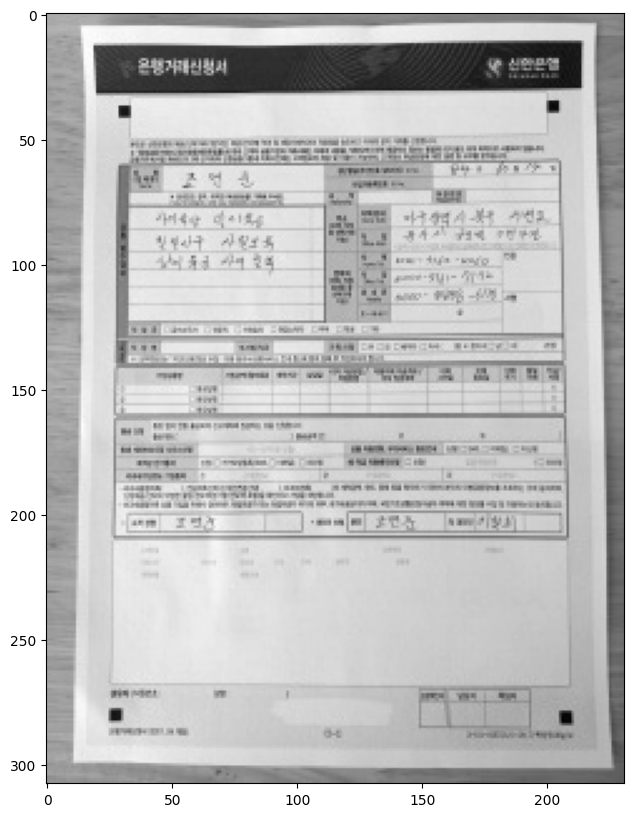

In [27]:
plt.figure(figsize=(15,10))
plt.imshow(test1, cmap='gray')

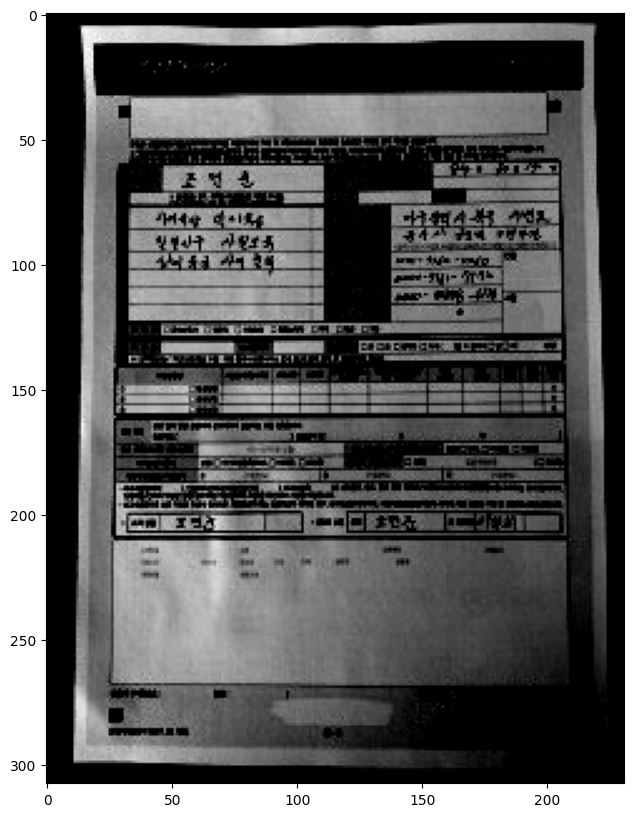

In [55]:
plt.figure(figsize=(15,10))
plt.imshow(np.clip(test1.astype('float32')-170, 0, 255), cmap='gray')

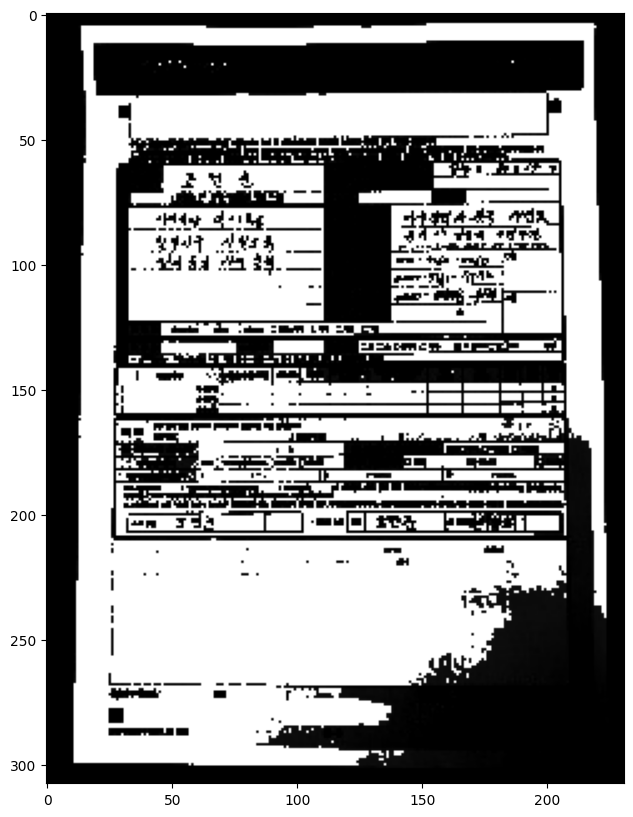

In [85]:
plt.figure(figsize=(15,10))
temp = np.clip(test1.astype('float32')-170, 0, 255)
np.place(temp, temp>13, 255)
plt.imshow(temp.astype('uint8'), cmap='gray')

In [47]:
print(np.mean(temp))

22.609617


In [49]:
print(np.median(temp))

25.0


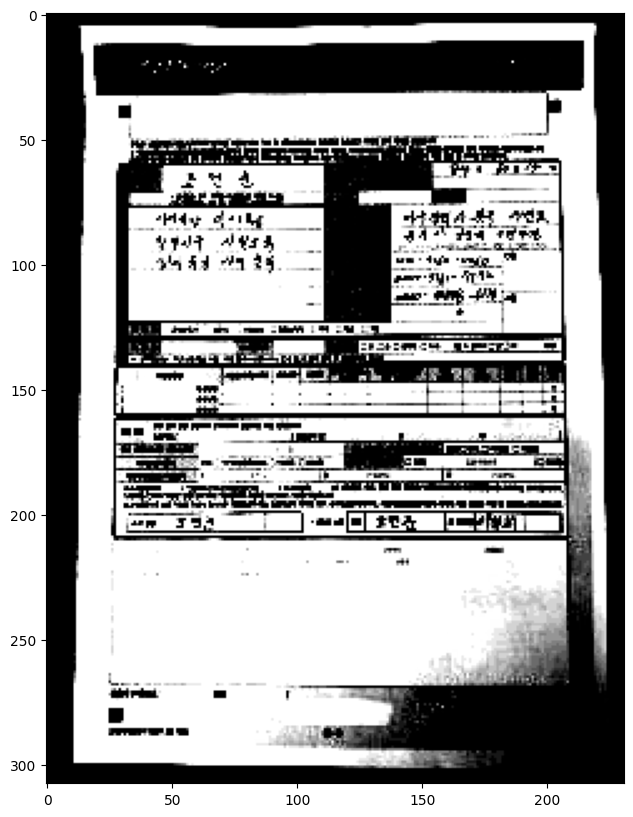

In [91]:
plt.figure(figsize=(15,10))
temp = np.clip(test1.astype('float32')-170, 0, 255)
plt.imshow(change_contrast_re(temp, avg=2, alpha=20), cmap='gray')

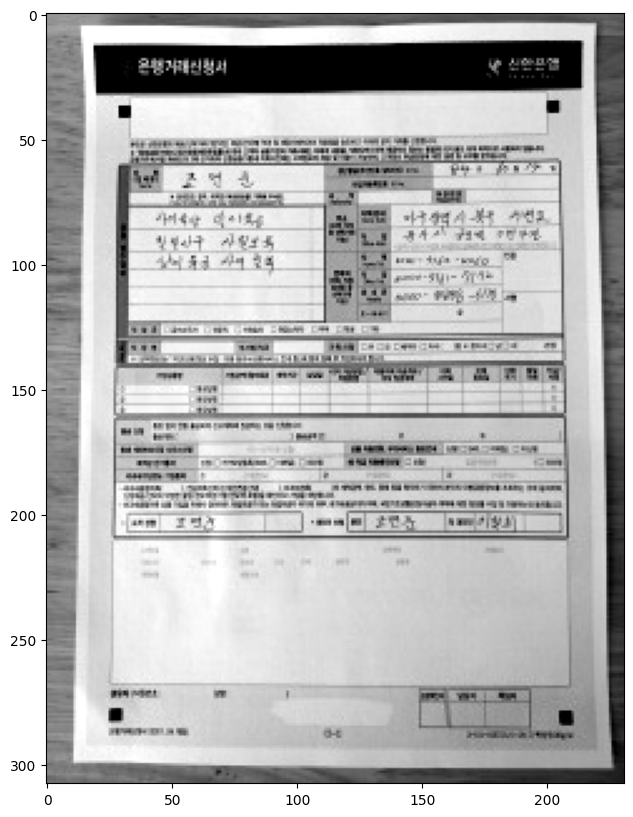

In [29]:
plt.figure(figsize=(15,10))
plt.imshow(change_contrast_re(test1, avg=np.mean(test1), alpha=1), cmap='gray')

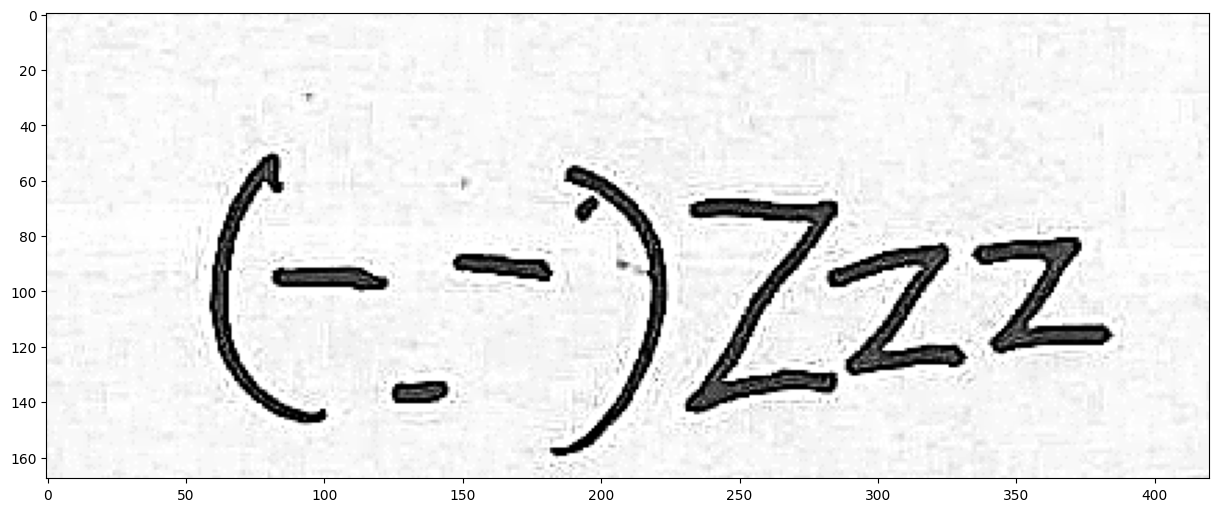

In [14]:
plt.figure(figsize=(15,10))
plt.imshow(shappen(test, alpha=9), cmap='gray')

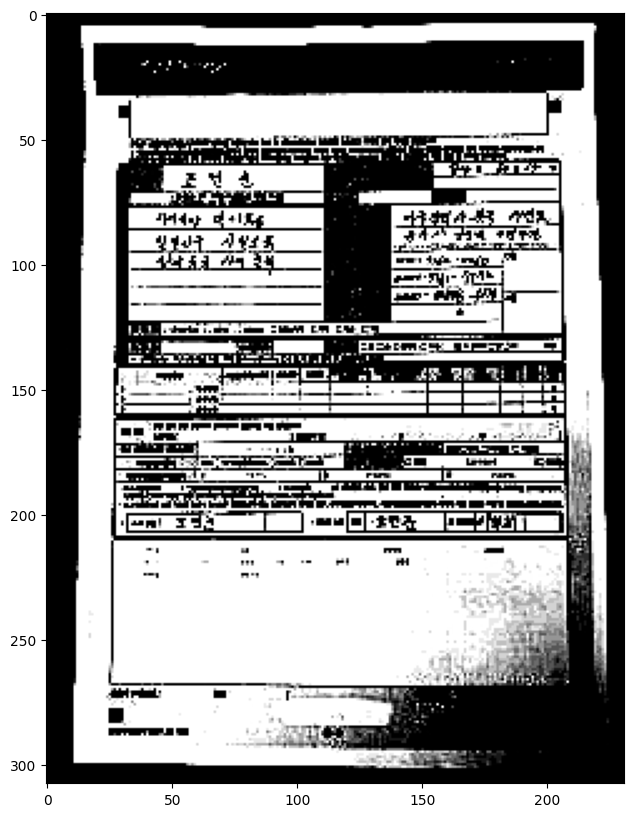

In [94]:
plt.figure(figsize=(15,10))
temp = np.clip(test1.astype('float32')-170, 0, 255)
plt.imshow(change_contrast_re(shappen(temp, alpha=1.5), avg=2, alpha=20), cmap='gray')